In [1]:

import cv2 as cv
import seaborn as sns
import os
import time
import pandas as pd
import SimpleITK as sitk
from skimage import io

In [2]:
if not os.path.exists('D:/Kaggle datasets/Thesis_Diabetic'):
    
    try:
        
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_0')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_1')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_2')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_3')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_4')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_0')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_1')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_2')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_3')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_4')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_0')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_1')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_2')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_3')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_4')
        
    except OSError:
        
        print('Creation of directory failed')
        
    else:
        
        print('Successfully created directory')
        
else:
    
    print('Directory already exists')

Successfully created directory


In [3]:
df_train = pd.read_csv('D:/Kaggle datasets/diabetic-retinopathy-detection/trainLabels.csv')

df_train.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [4]:

df_test = pd.read_csv('D:/Kaggle datasets/diabetic-retinopathy-detection/retinopathy_solution.csv')

df_test.head()

,image,level,Usage
0,1_left,0,Private
1,1_right,0,Private
2,2_left,0,Public
3,2_right,0,Public
4,3_left,2,Private


In [5]:
#check total number of images

df_images = df_train.count()

print (f'Toal number of images in the training set {df_images}')

# number of images belonging to each level

unique_count = df_train['level'].value_counts()

unique_count

Toal number of images in the training set image    35126
level    35126
dtype: int64


0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

<AxesSubplot:xlabel='level', ylabel='count'>

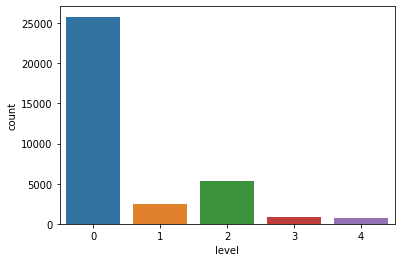

In [6]:
#check number of images in each class

sns.countplot(x = 'level', data = df_train)

In [8]:
df_train_new = df_train.iloc[:30000,:]
df_train_new.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [9]:
df_images = df_train_new.count()

print (f'Toal number of images in the new training set {df_images}')

# number of images belonging to each level

unique_count = df_train_new['level'].value_counts()

unique_count

Toal number of images in the new training set image    30000
level    30000
dtype: int64


0    21978
2     4568
1     2078
3      770
4      606
Name: level, dtype: int64

In [10]:
df_val = df_train.iloc[30001:,:]
df_val.head()

,image,level
30001,37951_right,4
30002,37953_left,1
30003,37953_right,0
30004,37954_left,0
30005,37954_right,0


In [11]:
df_images = df_val.count()

print (f'Toal number of images in the new training set {df_images}')

# number of images belonging to each level

unique_count = df_val['level'].value_counts()

unique_count

Toal number of images in the new training set image    5125
level    5125
dtype: int64


0    3832
2     724
1     365
3     103
4     101
Name: level, dtype: int64

<AxesSubplot:xlabel='level', ylabel='count'>

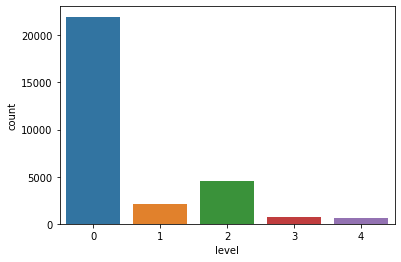

In [12]:
#train set

sns.countplot(x = 'level', data = df_train_new)

<AxesSubplot:xlabel='level', ylabel='count'>

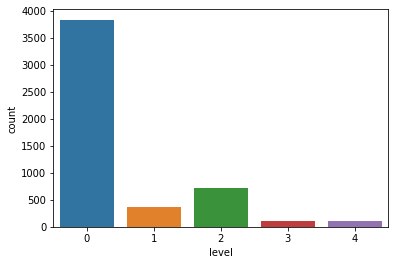

In [13]:
sns.countplot(x = 'level', data = df_val)

<AxesSubplot:xlabel='level', ylabel='count'>

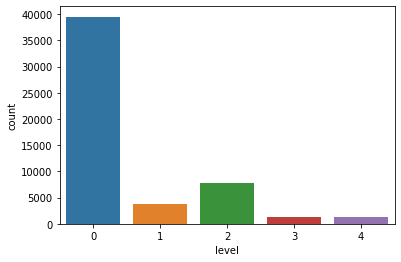

In [14]:
sns.countplot(x = 'level', data = df_test)

In [17]:
def create_dataset(df,path,image_size,dataset):
    
    for i, item in df.iterrows():
        
        img = sitk.ReadImage(path + item[0] +'.jpg')
        img = sitk.GetArrayFromImage(img)
        img = cv.resize(img,(image_size,image_size))
        
        if item[1]==0:
            io.imsave(f'D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/{dataset}/Level_0/'+item[0]+f'_{dataset}_Level_0.png',img)
        elif item[1]==1:
            io.imsave(f'D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/{dataset}/Level_1/'+item[0]+f'_{dataset}_Level_1.png',img)
        elif item[1]==2:
            io.imsave(f'D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/{dataset}/Level_2/'+item[0]+f'_{dataset}_Level_2.png',img)
        elif item[1]==3:
            io.imsave(f'D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/{dataset}/Level_3/'+item[0]+f'_{dataset}_Level_3.png',img)
        else:
            io.imsave(f'D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/{dataset}/Level_4/'+item[0]+f'_{dataset}_Level_4.png',img)

In [18]:
path_train = 'D:/Kaggle datasets/Thesis/archive/resized train 15/'

create_dataset(df_train_new,path_train,image_size=1024,dataset='Train')

print('Training set created')

C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_0/1557_left_Train_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_0/1986_left_Train_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_0/2516_left_Train_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Trai

Training set created


In [19]:
path_val = 'D:/Kaggle datasets/Thesis/archive/resized train 15/'

create_dataset(df_val,path_train,image_size=1024,dataset='Val')

print('Validation set created')

C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_0/41176_left_Val_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_0/43452_left_Val_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_1/43457_left_Val_Level_1.png is a low contrast image
  if sys.path[0] == '':
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:14: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/Level_2/43921_left_Val_Level_2.png is a

Validation set created


In [20]:
path_test = 'D:/Kaggle datasets/Thesis/archive/resized test 15/'

create_dataset(df_test,path_test,image_size=1024,dataset='Test')

print('Test set created')

C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_0/3517_left_Test_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_0/4751_right_Test_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Level_0/5231_left_Test_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/Leve

Test set created
